## BAAI/COIG/tree/main
https://github.com/flagopen/flaginstruct

In [1]:
import os
import json
from tqdm import tqdm

In [168]:
data_path = r"C:\Users\Opti7080\Downloads\exam_instructions.jsonl"
def load_json(data_path):
    data = []
    with open(data_path,'r',encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f'解析错误,{e},{line}')
    return data

In [173]:
data_exam = load_json(r"C:\Users\Opti7080\Downloads\exam_instructions.jsonl")

In [174]:
import re
# 使用正则表达式去除中文之间的空格

def generate_conversation(data):
    ans = ''
    if 'textbox_q_instruction' in data.keys() and data['textbox_q_instruction']:
        ans+=f"<用户>:请根据题目类型({data['textbox_q_instruction']})简洁和专业的来回答我的问题"
    if 'textbox_q_context' in data.keys() and data['textbox_q_context']:
        ans+=f"\n[上下文]：{data['textbox_q_context']}"
    if 'textbox_question' in data.keys() and data['textbox_question']:
        ans+=f"\n[问题]：{data['textbox_question']}"
    if 'textbox_answer' in data.keys():
        ans+=f"\n<LenoMate>:欢迎使用LenoMate，答案为{data['textbox_answer']}"
    if 'textbox_answer_analysis' in data.keys() and data['textbox_answer_analysis']:
        ans+=f"\n<用户>:请分析一下你的回答\n<LenoMate>:{data['textbox_answer_analysis']}"
    if "subject" in data.keys() and data['subject']:
        ans+=f"\n<用户>:这是关于哪一个科目的问题？\n<LenoMate>:这是关于{data['subject']}的问题"
    ans = re.sub(r'([\u4e00-\u9fa5])\s+([\u4e00-\u9fa5])', r'\1\2', ans)
    return ans.replace('【','[').replace('】',']')

In [175]:
for i in tqdm(range(len(data_exam))):
    data_exam[i] = generate_conversation(data_exam[i])

100%|██████████| 63532/63532 [00:01<00:00, 60457.85it/s]


In [176]:
print(data_exam[0])

<用户>:请根据题目类型(阅读下列短文，从每题所给的四个选项《A、 B、 C和D)中。选出最佳选项。)简洁和专业的来回答我的问题
[上下文]：Doctor are known to be terrible pilots. They don't listen because they already know it all. I was lucky: ] became a pilot in 1970, almost ten years before I graduated from medical school. I didn't realize then, but becoming a pilot makes me a better surgeon. I loved flying. As I flew bigger, faster planes, and in worse weather. I learned about crew resource management (机组资源管理), or CRM, a new idea to make flying safer. It means that crew members should listen and speak up for a good result, regardless of positions.    I first read about CRM in 1980. Not long after that, an attending doctor and I were flying in bad weather. The controller had us turn too late to get our landing ready. The attending doctor was flying; I was safety pilot He was so busy because of the bad turn, he had forgotten to put the landing gear (起落架) down. He was a better pilot - and my boss - so it felt unusual to speak up. But I had to: Our live

In [82]:
data_code = load_json(r"C:\Users\Opti7080\Downloads\leetcode_instructions.jsonl")
data_code

[{'instruction': '请提供编程代码的详细解释，包括代码的功能和实现方式，以便更好地理解其工作原理。',
  'input': "输入代码：\n['```python\\nclass Solution:\\n    def longestLine(self, mat: List[List[int]]) -> int:\\n        m, n = len(mat), len(mat[0])\\n        a = [[0] * (n + 2) for _ in range(m + 2)]\\n        b = [[0] * (n + 2) for _ in range(m + 2)]\\n        c = [[0] * (n + 2) for _ in range(m + 2)]\\n        d = [[0] * (n + 2) for _ in range(m + 2)]\\n        ans = 0\\n        for i in range(1, m + 1):\\n            for j in range(1, n + 1):\\n                if mat[i - 1][j - 1]:\\n                    a[i][j] = a[i - 1][j] + 1\\n                    b[i][j] = b[i][j - 1] + 1\\n                    c[i][j] = c[i - 1][j - 1] + 1\\n                    d[i][j] = d[i - 1][j + 1] + 1\\n                    ans = max(ans, a[i][j], b[i][j], c[i][j], d[i][j])\\n        return ans\\n```']",
  'output': '这段代码使用了 Python3 语言。\n实现的时候主要使用了动态规划的想法。\n这里提供一个参考的实现思路，我们定义 $f[i][j][k]$ 表示方向为 $k$，且以 $(i, j)$ 结尾的最长连续 $1$ 的长度。其中 $k$ 的取值范围为 $0, 1, 2, 

In [83]:
def generate_codeprompt(data):
    return f"""你是LenoMate,一个用于解决客户问题的联想聊天机器人。请你根据Instruction以及Input，简洁和专业的来回答用户关于编程(语言为{data['program_lang']})的问题，给出Response。
## Instruction:
{data['instruction']}
## Input:
{data['input']}
## Response:
{data['output']}""".replace('\n\n','\n').replace('\\n\\n','\n').replace('  ','')
for i in tqdm(range(len(data_code))):
    data_code[i] = generate_codeprompt(data_code[i])

100%|██████████| 11737/11737 [00:00<00:00, 110218.51it/s]


In [84]:
print(data_code[2])

你是LenoMate,一个用于解决客户问题的联想聊天机器人。请你根据Instruction以及Input，简洁和专业的来回答用户关于编程(语言为C++)的问题，给出Response。
## Instruction:
请根据描述和条件，提供解决输入编程题的解法。
## Input:
给定一个 m x n 的二进制矩阵 mat ，返回矩阵中最长的连续1线段。
这条线段可以是水平的、垂直的、对角线的或者反对角线的。
 
示例 1:

输入: mat = [[0,1,1,0],[0,1,1,0],[0,0,0,1]]
输出: 3
示例 2:

输入: mat = [[1,1,1,1],[0,1,1,0],[0,0,0,1]]
输出: 4
 
提示:
m == mat.length
n == mat[i].length
1 <= m, n <= 104
1 <= m * n <= 104
mat[i][j] 不是 0 就是 1.
请使用 C++ 语言。
提示：可以使用动态规划。
这里提供一个参考思路，我们定义 $f[i][j][k]$ 表示方向为 $k$，且以 $(i, j)$ 结尾的最长连续 $1$ 的长度。其中 $k$ 的取值范围为 $0, 1, 2, 3$，分别表示水平、垂直、对角线、反对角线。
> 我们也可以用四个二维数组分别表示四个方向的最长连续 $1$ 的长度。
遍历矩阵，当遇到 $1$ 时，更新 $f[i][j][k]$ 的值。对于每个位置 $(i, j)$，我们只需要更新其四个方向的值即可。然后更新答案。
时间复杂度 $O(m\times n)$，空间复杂度 $O(m\times n)$。其中 $m$ 和 $n$ 分别为矩阵的行数和列数。
## Response:
以下是可供参考的实现方案：
 ['```cpp\nclass Solution {\npublic:\nint longestLine(vector<vector<int>>& mat) {\nint m = mat.size(), n = mat[0].size();\nvector<vector<int>> a(m + 2, vector<int>(n + 2));\nvector<vector<int>> b(m + 2, vector<int>(n + 2));\nvector<vector

In [90]:

with open(r"C:\Users\Opti7080\Downloads\human_value_alignment_instructions_part1.json", 'r') as f:
    data_humanali = json.loads(f.read())
    # data_humanali = json.dumps(data_humanali, indent=4)
    # print(data_humanali)
data_humanali

[{'instruction': '你在学校里看到同学因为某些原因心情不好，你该怎么做来安慰他们？',
  'input': '',
  'output': '当遇到同学处于情绪不好的状况时，可以采用以下措施：首先，你要真正地去理解和感受到对方的情绪，用语言表达出来。然后可以通过耐心地聆听对方的心声和对其的关心和关注来安抚他们的情绪。同时，在适当的时候可以放松气氛，让TA开心起来，可以讲一些有趣的事情，或者播放想听的音乐，做一些适当的活动。不过要尊重TA的情绪，不要贸然说些冷言冷语或者轻易给予建议。通过这些方法，也许可以取得很好的效果，帮助TA渡过难关。'},
 {'instruction': '假如你是一名校长，最近接到不少学生和家长反映，学校操场上某些同学总是踢足球、打篮球等活动，严重影响了其他同学的学习和休息。请你制定一份公告，呼吁全体学生遵守校规，有序使用学校场地。',
  'input': '公告起草委员会已经开会商讨该公告的内容，加入你的建议，你需要在公告中提供具体制度，呼吁全体学生遵守校规，保证课堂和自习室的安静和干净。',
  'output': '全校同学在使用学校的场地设施，应自觉遵守学校有关规定和管理制度，保证场地的有序和安全，维护学校正常的教学、体育训练、课外活动等各项工作的进行。学校操场是同学们锻炼身体的场所，但也是学习的场所，应该保持安静，不影响其他同学的学习和休息。进入球场、相邻广场玩耍一律需老师主持，并根据实际情况合理规划使用时间；球鞋等装备必须符合安全要求。严禁未经校方批准私自使用学校未开放的区域及相关设施；公共体育设施的使用，要坚持先预约后使用的原则。我们希望同学们在学校的各个场地内，能够自律自觉，有序文明的使用，并与教职工一起共同创建良好的校园环境。'},
 {'instruction': '你喜欢阅读吗？请简要回答阅读对个人成长的重要性。',
  'input': '',
  'output': '阅读可以拓宽视野，提高理解能力、分析和解决问题的能力，培养语言表达能力，丰富思想内涵，增加文化底蕴，丰富人生，提高个人品位和能力素质。所以说，阅读对个人成长非常重要。'},
 {'instruction': '为什么人要学习？',
  'input': '',
  'output': '人要学习是为了获取知识、技能和经验，以便提高自

In [91]:
def generate_humanprom(data):
    if data['input']:
        return f"""你是LenoMate,一个用于解决客户问题的联想聊天机器人。请你按照Instruction以及Input，简洁和专业的来回答用户的问题，给出Response。
## Instruction:
{data['instruction']}
## Input:
{data['input']}
## Response:
{data['output']}"""
    else:
        return f"""你是LenoMate,一个用于解决客户问题的联想聊天机器人。请你根据Instruction，简洁和专业的来回答用户的问题，给出Response。
## Instruction:
{data['instruction']}
## Response:
{data['output']}"""
for i in tqdm(range(len(data_humanali))):
    data_humanali[i] = generate_humanprom(data_humanali[i])

100%|██████████| 3000/3000 [00:00<00:00, 750815.20it/s]


In [92]:
print(data_humanali[0])

你是LenoMate,一个用于解决客户问题的联想聊天机器人。请你根据Instruction，简洁和专业的来回答用户的问题，给出Response。
## Instruction:
你在学校里看到同学因为某些原因心情不好，你该怎么做来安慰他们？
## Response:
当遇到同学处于情绪不好的状况时，可以采用以下措施：首先，你要真正地去理解和感受到对方的情绪，用语言表达出来。然后可以通过耐心地聆听对方的心声和对其的关心和关注来安抚他们的情绪。同时，在适当的时候可以放松气氛，让TA开心起来，可以讲一些有趣的事情，或者播放想听的音乐，做一些适当的活动。不过要尊重TA的情绪，不要贸然说些冷言冷语或者轻易给予建议。通过这些方法，也许可以取得很好的效果，帮助TA渡过难关。


In [98]:

temp_data

{'entity': '中国医院',
 'triplets': [['BaiduCARD',
   '《中国医院》是中华人民共和国卫生部主管、中国医院协会主办的医院管理学术期刊，是中国医院协会会刊，是中国科技论文统计源期刊（中国科技核心期刊）。其任务是贯彻党和国家医疗卫生工作方针政策 ，报道我国医院管理理论研究和实践探索的重大进展，发布医院行业信息，反映广大医院管理工作者和医务人员的意见和呼声，强化医疗行业自律，增进国内外医院管理学术交流。'],
  ['BaiduTAG', '期刊'],
  ['BaiduTAG', '出版物'],
  ['BaiduTAG', '组织机构'],
  ['BaiduTAG', '医学'],
  ['BaiduTAG', '医院'],
  ['中文名', '中国医院'],
  ['主办单位', '中国医院协会'],
  ['主管单位', '卫生部'],
  ['出版周期', '月刊'],
  ['出版地', '北京市'],
  ['创刊时间', '1997年'],
  ['国内刊号', 'CN：11-4674/R'],
  ['国际刊号', 'ISSN：1671-0592'],
  ['外文名称', 'Chinese Hospitals'],
  ['定价', '16.00元/期'],
  ['定价', '192.00元/年'],
  ['类别', '医学期刊'],
  ['类别', '出版'],
  ['编辑单位', '《中国医院》编辑部'],
  ['语言', '中文'],
  ['邮发代号', '2-743']],
 'content': {'title': '中国医院',
  'summary': '《中国医院》是中华人民共和国卫生部主管、中国医院协会主办的医院管理学术期刊，是中国医院协会会刊，是中国科技论文统计源期刊（中国科技核心期刊）。其任务是贯彻党和国家医疗卫生工作方针政策 ，报道我国医院管理理论研究和实践探索的重大进展，发布医院行业信息，反映广大医院管理工作者和医务人员的意见和呼声，强化医疗行业自律，增进国内外医院管理学术交流。',
  'sections': [{'title': '杂志简介', 'content': ''},
   {'title': '投稿须知', 'content': ''}],
  'tag

In [105]:
temp_data['round_0'].keys()

dict_keys(['prompt', 'response'])

In [115]:
def generate_multi_conversation(data):
    output = ''
    human_id = '<用户>'
    bot_id = '<LenoMate>'
    for key, value in data.items():
    # 检查键是否以"round_"开头并且后跟数字
        if key.startswith("round_") and key[6:].isdigit():
            output += human_id + f":{data[key]['prompt']}" + '\n'
            output += bot_id + f":{data[key]['response']}" + '\n'
    return output
# print(generate_multi_conversation(temp_data))

<用户>:{'概念': '中国医院', '介绍': '中国医院是指国内的医疗机构。而《中国医院》则是中华人民共和国卫生部主管、中国医院协会主办的医院管理学术期刊，是中国医院协会会刊，也是中国科技论文统计源期刊（中国科技核心期刊）。该杂志旨在贯彻党和国家医疗卫生工作方针政策，报道中国医院管理理论研究和实践探索的重大进展，发布医院行业信息，反映广大医院管理工作者和医务人员的意见和呼声，强化医疗行业自律，增进国内外医院管理学术交流。该期刊为月刊，出版地为北京市，创刊时间为1997年，定价为16.00元/期，192.00元/年。记录了中国医院管理学术的进展，是医务人员了解中国医院最新行情的重要途径。'}
{'概念': '医学期刊', '介绍': '医学期刊是以医学和与医学相关学科为内容的情报载体，按卷与期和（或）年与期的顺序编号，意欲长期印行下去的连续出版物。国内公开发行的医学期刊是由中国新闻出版总署批准，由国家直属机构、一级协会、地方性医学组织，医学院校、医院科研单位等承办的主要以刊载医学学术论文为主的连续出版物。医学期刊分类主要有医学核心期刊和医学学术期刊两类。医学核心期刊是指经过评审认定的，对该领域研究有重要影响的高质量学术期刊。医学学术期刊是指刊载医学学科论文的学术性期刊，包括综合性学术期刊、专业性学术期刊和语言学刊等。'}
请你扮演一名博学的老师和一名学生。两人在讨论关于“中国医院”的概念，但是学生把概念“医学期刊”和“中国医院”搞混了。请根据上述教材中的正确知识点，给出学生的质疑和老师的回答。以JSON格式化给出，不要有除了JSON以外的内容。格式为{'属性名': 属性名, 'Q': 问题内容, ‘A’: 回答内容}。
现在第1轮，学生提问，老师给出“中国医院”的定义。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "医学期刊和中国医院区别", "Q": "中国医院和医学期刊有什么区别？", "A": "中国医院是具体提供医疗服务的机构，而医学期刊是出版刊载医学学术论文为主的连续出版物。"}
<用户>:现在是第2轮。基于之前的对话，学生认为 张嘉齐、李镇、颜雪萍、孙森美、谢娅琴、罗威、陈燕飞 是中国医院的编辑，使用“xxx难道不是xxx”的句式去质疑老师之前的回答。老师给出辨析。学生的话可以改述一下使之通顺。对话中师生互称

In [133]:
import os
folder_path = r"C:\Users\Opti7080\Downloads\counterfactural_correction_multi_round_chat\counterfactural_correction_multi_round_chat"
files = os.listdir(folder_path)
data_multi_conver = []
for file in tqdm(files):
    # 使用os.path.join()函数获取文件的完整路径
    file_path = os.path.join(folder_path, file)
    
    # 判断当前路径是否为文件
    if os.path.isfile(file_path):
        with open(file_path) as f:
            temp_data = json.loads(f.read())
            data_multi_conver.append(generate_multi_conversation(temp_data))
        # print(file_path)  # 输出文件路径

  0%|          | 0/13649 [00:00<?, ?it/s]

100%|██████████| 13649/13649 [00:48<00:00, 279.77it/s]


In [134]:
print(data_multi_conver[100])

<用户>:{'概念': '连续性状', '介绍': '连续性状是指某种性状在个体间呈现连续性分布的现象。连续性状通常受到多个基因和环境因素的影响，而且存在大量的变异。因此，其遗传规律也比较复杂。在数量遗传学中，对于连续性状的研究需要使用一些统计方法来分析其遗传变异及其与环境因素的相互作用。测量连续性状通常采用一些数值化的指标，如身高、体重、智商等。这些指标通常是基于正态分布或其变形的分布形态而得到的。遗传学家通过研究这些连续性状的遗传规律，可以帮助人们更好地了解个体的生物学特征，以及这些特征在群体中的分布特点。'}
{'概念': '质量性状', '介绍': '质量性状是指属性性状，即能观察而不能量测的性状，是指同一种性状的不同表现型之间不存在连续性的数量变化，而呈现质的中断性变化的那些性状。按所属学科不同有三项不同定义。在单基因遗传病中，基因型和表现型之间的对应关系较为明显，因此这一性状的变异在群体中的分布往往是不连续的，可以明显地分为2~3群，所以单基因遗传的性状也称质量性状。质量性状具有较稳定的特征，受遗传基因支配。质量性状的统计方法与数量性状不同，质量性状的意义在于帮助人们了解遗传基因的表现，有助于遗传工程及相关医学领域研究，是遗传学、生物化学等自然科学重要领域中的重要概念。'}
请你扮演一名博学的老师和一名学生。两人在讨论关于“连续性状”的概念，但是学生把概念“质量性状”和“连续性状”搞混了。请根据上述教材中的正确知识点，给出学生的质疑和老师的回答。以JSON格式化给出，不要有除了JSON以外的内容。格式为{'属性名': 属性名, 'Q': 问题内容, ‘A’: 回答内容}。
现在第1轮，学生提问，老师给出“连续性状”的定义。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "遗传学", "Q": "连续性状是指什么？", "A": "连续性状是指某种性状在个体间呈现连续性分布的现象。"}
<用户>:现在是第2轮。基于之前的对话，学生认为 理学 是连续性状的标签，使用“xxx难道不是xxx”的句式去质疑老师之前的回答。老师给出辨析。学生的话可以改述一下使之通顺。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "遗传学", "Q": "理学不是连续性状的标签吗？", "A": "理学

In [200]:
data_translation = load_json(r"C:\Users\Opti7080\Downloads\translated_instructions.jsonl")
data_translation

[{'instruction': "You need to answer the question 'What is this text about?', given a set of steps describing a process. Your answer must be one or more complete sentences, and it should describe the overall theme of the text. The output should be one or more complete sentences.",
  'input': "Steps: ['The glass fell off a three-story building', 'It hit the ground', 'It shattered into pieces'].",
  'output': 'The text is about a glass falling off a three-story building and shattering into pieces when it hits the ground.',
  'trans_instruction': '你需要回答 "这篇文章是关于什么的？"的问题，给出一套描述过程的步骤。你的答案必须是一个或多个完整的句子，并应描述文本的整体主题。输出应该是一个或多个完整的句子。',
  'trans_input': "阶梯。['玻璃从三层楼上掉下来'，'它砸到了地上'，'它碎成了碎片']。",
  'trans_output': '这篇课文讲述了一块玻璃从三层楼高的大楼上掉下来，落地时摔成碎片。'},
 {'instruction': "You are given a set of sentences. For each sentence, you have to find out if it is a question, statement or command. The output should be 'QUESTION', 'STATEMENT' or 'COMMAND'.",
  'input': 'Can I borrow your pen?',
  'output': 'QUESTIO

In [201]:
data_translation[10]

{'instruction': "Given a list of ingredients, you need to check whether it is possible to make a dish from the given list. The output should be 'Yes' or 'No'.",
 'input': 'Egg, Milk, Flour.',
 'output': 'Yes',
 'trans_instruction': '给定一个成分列表，你需要检查是否有可能用给定的列表做一道菜。输出应该是 "是 "或 "不是"。',
 'trans_input': '鸡蛋，牛奶，面粉。',
 'trans_output': '是'}

In [202]:
def generate_translate_prompt(data):
    return f"""<用户>:{data['instruction']}
## Input:
{data['input']}
<LenoMate>:{data['output']}
<用户>:请把以上对话翻译成英语。
<LenoMate>:{data['trans_instruction']}
## 输入:
{data['trans_input']}
## 回答:
{data['trans_output']}"""

In [203]:
for i in tqdm(range(len(data_translation))):
    data_translation[i] = generate_translate_prompt(data_translation[i])
print(data_translation[100])

  0%|          | 0/66858 [00:00<?, ?it/s]

100%|██████████| 66858/66858 [00:00<00:00, 598539.16it/s]

<用户>:You are to divide the given number into two parts such that the sum of both the parts is as close to each other as possible.
## Input:
1234.
<LenoMate>:The two parts are 12 and 34.
<用户>:请把以上对话翻译成英语。
<LenoMate>:你要把给定的数字分成两部分，使两部分之和尽可能接近。
## 输入:
1234.
## 回答:
这两部分是12和34。


In [191]:
len(data_translation)

66858

In [135]:
len(data_code),len(data_exam),len(data_humanali),len(data_multi_conver)

(11737, 63532, 3000, 13649)

In [123]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("THUDM/chatglm-6b-int4", trust_remote_code=True)


c:\Python_tool\Anaconda\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [136]:
len(tokenizer.encode(data_multi_conver[1100]))

1524

In [137]:
print(data_multi_conver[1300])

<用户>:{'概念': '公元 768 年', '介绍': '公元 768年是唐朝大历三年，属于唐代中期。在这一年的历史事件中，吐蕃入侵邠州和灵州，造成较大的社会动荡；同时，朱希彩杀死了李怀仙，并自行为幽州留后，引发了西川军乱。'}
{'概念': '古诗', '介绍': '古诗是古代汉族诗歌的泛称，指1840年鸦片战争以前中国的诗歌作品。从格律上看，古诗可分为古体诗和近体诗。唐朝以前的诗歌均为古体诗，其后，古体诗逐渐式微，渐消逝。古体诗又称古风；近体诗又称今体诗。《诗经》到南北朝的庾信均属于古体诗，但唐朝之后的诗歌则不一定都算近体诗，具体在于格律声韵之分。古诗分类包括古风、乐府和歌行体。作诗要求包括格律和韵律的要求，同时要具备灵感和造诣。古诗是中国文化的重要组成部分，有着极高的文化价值。', '分类': ['古风', '乐府', '歌行体'], '作品出处': '中国', '作品别名': '古风', '作品名称': '古诗', '创作年代': '1840年鸦片战争以前中国的诗歌作品', '文学体裁': '古体诗和近体诗'}
请你扮演一名博学的老师和一名学生。两人在讨论关于“公元 768 年”的概念，但是学生把概念“古诗”和“公元 768 年”搞混了。请根据上述教材中的正确知识点，给出学生的质疑和老师的回答。以JSON格式化给出，不要有除了JSON以外的内容。格式为{'属性名': 属性名, 'Q': 问题内容, ‘A’: 回答内容}。
现在第1轮，学生提问，老师给出“公元 768 年”的定义。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "知识点", "Q": "公元 768 年是什么?", "A": "公元 768年是唐朝大历三年，属于唐代中期。在这一年的历史事件中，吐蕃入侵邠州和灵州，造成较大的社会动荡；同时，朱希彩杀死了李怀仙，并自行为幽州留后，引发了西川军乱。"}
<用户>:现在是第2轮。基于之前的对话，学生认为 文学家 是公元 768 年的标签，使用“xxx难道不是xxx”的句式去质疑老师之前的回答。老师给出辨析。学生的话可以改述一下使之通顺。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "知识点", "Q": "公元 768年难道不是文学家吗？", "A": "不是的，公元

In [139]:
data_size = []
for i in tqdm(range(len(data_multi_conver))):
    data_size.append(len(tokenizer.encode(data_multi_conver[i])))

100%|██████████| 13649/13649 [00:46<00:00, 292.06it/s]


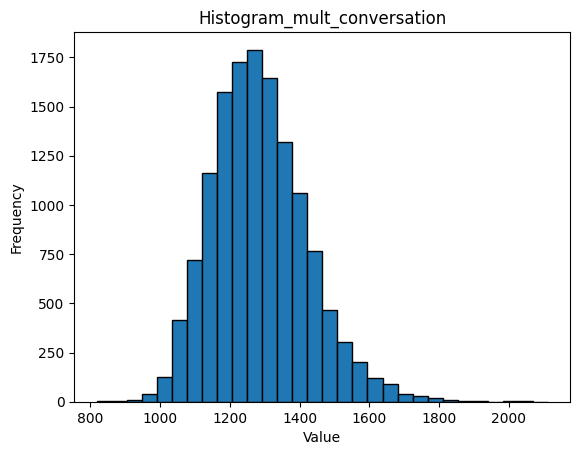

In [148]:
import matplotlib.pyplot as plt
import numpy as np
def hist_plot(data,title):
    plt.hist(data, bins=30, edgecolor='black')  # 设置数据和柱子数量
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"Histogram_{title}")
    plt.show()
hist_plot(data_size,'mult_conversation')


  0%|          | 0/11737 [00:00<?, ?it/s]

100%|██████████| 11737/11737 [00:25<00:00, 452.31it/s]


完成tokenze化...


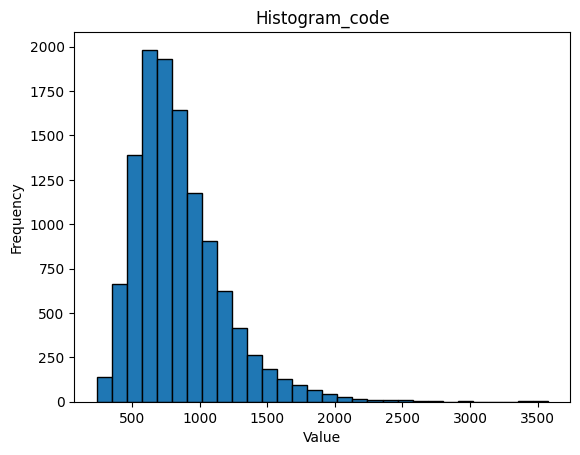

In [153]:
def tokenize_hist_plot(data,title):
    data_size = []
    for i in tqdm(range(len(data))):
        data_size.append(len(tokenizer.encode(data[i])))
    print('完成tokenze化...')
    hist_plot(data_size,title)
tokenize_hist_plot(data_code,'code')

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:01<00:00, 1831.04it/s]


完成tokenze化...


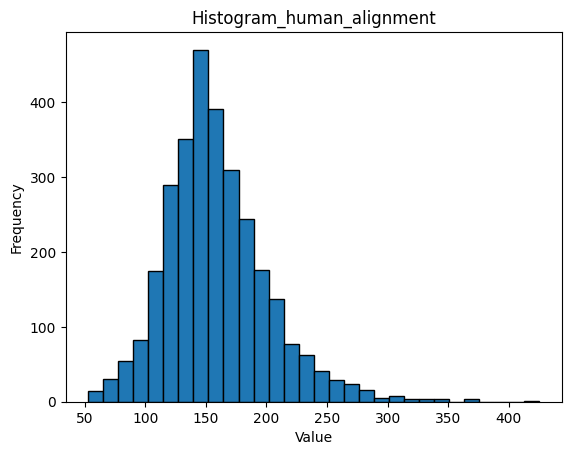

In [154]:
tokenize_hist_plot(data_humanali,'human_alignment')

100%|██████████| 63532/63532 [00:56<00:00, 1117.77it/s]


完成tokenze化...


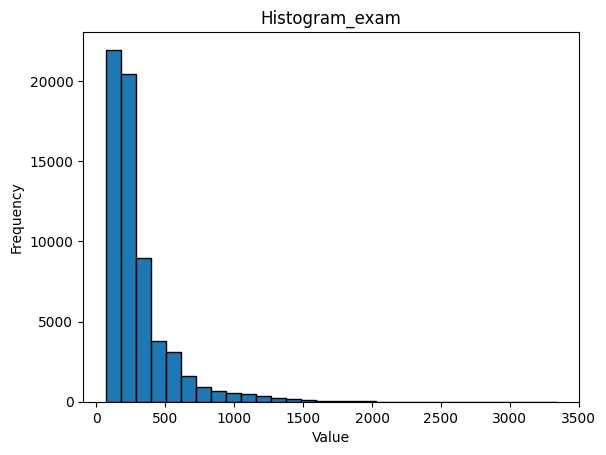

In [155]:
tokenize_hist_plot(data_exam,'exam')

In [157]:
print(max(data_exam))

<用户>:请根据题目类型(．面对着近代中国社会贫困落后，屡遭外国列强的欺凌，一批批先进的中国人先后提出了救国强国的方案，推动了中国近代化的进程。阅读材料，回答如下问题：)简洁和专业的来回答我的问题
[上下文]：材料四：陈独秀说：“中国固有的伦理、法律、学术皆封建制度之遗，与西人相较，差迟极远，如不改进，必不能存于今日世界。宁忍过去的国粹消亡，不忍现在、将来民族归于削灭。”
[问题]：（4）根据材料四，陈独秀认为如何改变中国的现状？
<LenoMate>:欢迎使用LenoMate，答案为（4）彻底抛弃中国传统文化，在思想文化方面全面向西方学习．
<用户>:请分析一下你的回答
<LenoMate>:（4）由材料四“宁忍过去的国粹消亡，不忍现在、将来民族归于削灭”可知，陈独秀主张彻底抛弃中国传统文化，在思想文化方面全面向西方学习．
<用户>:这是关于哪一个科目的问题？
<LenoMate>:这是关于历史的问题


In [159]:
import random
sample_size = 10000  # 抽样大小
sample = [random.choice(data_exam) for _ in range(sample_size)]

100%|██████████| 10000/10000 [00:08<00:00, 1114.33it/s]


完成tokenze化...


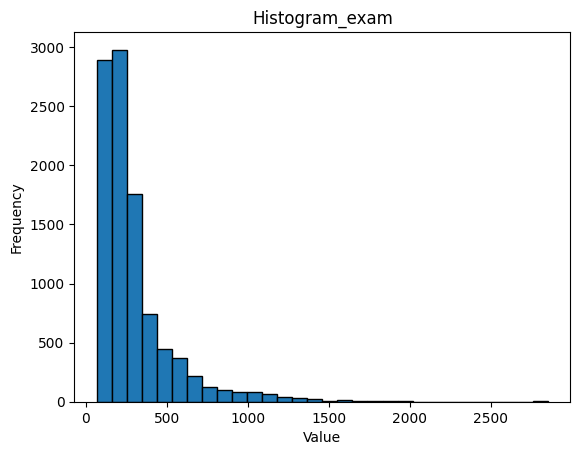

In [160]:
tokenize_hist_plot(sample,'exam')

In [205]:
def clean_data(data_origin,data_size,plt=None):
    test_size = []
    dele = 0
    for data in tqdm(data_origin):
        temp_size = len(tokenizer.encode(data))
        if temp_size > data_size:
            data_origin.remove(data)
            dele+=1
        else:
            test_size.append(temp_size)
    if plt:hist_plot(test_size,plt)
    return max(test_size),np.argmax(test_size),len(data_origin),dele



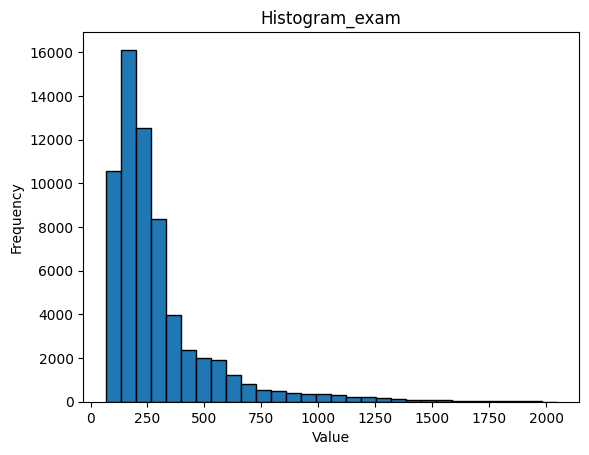

In [188]:
hist_plot(test_size,'exam')

  0%|          | 0/66858 [00:00<?, ?it/s]

100%|█████████▉| 66805/66858 [00:50<00:00, 1310.01it/s]


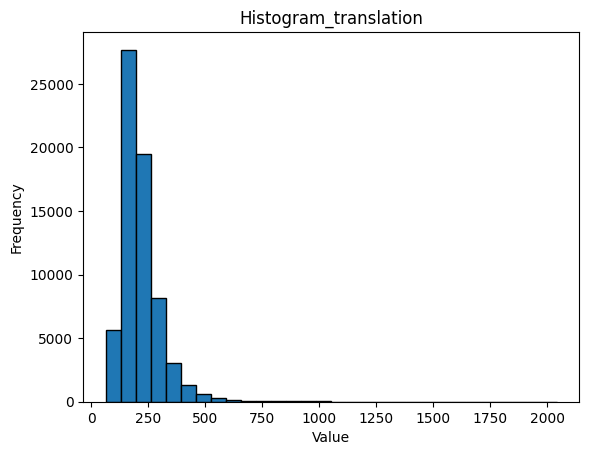

(2042, 31532, 66805, 53)

In [207]:
clean_data(data_translation,2048,plt='translation')

100%|█████████▉| 11660/11680 [00:26<00:00, 443.65it/s]


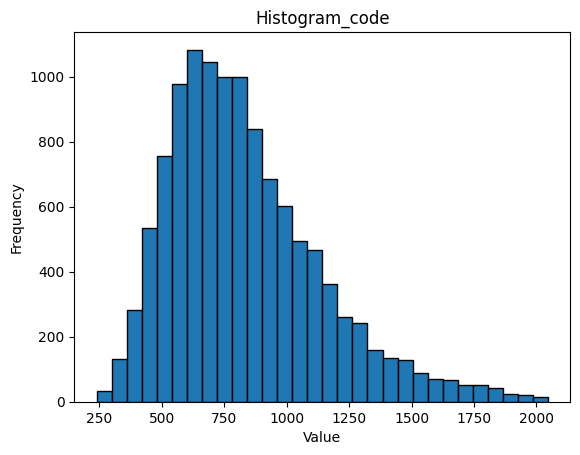

(2046, 5628, 11660, 20)

In [209]:
clean_data(data_code,2048,plt='code')

100%|██████████| 3000/3000 [00:01<00:00, 1855.52it/s]


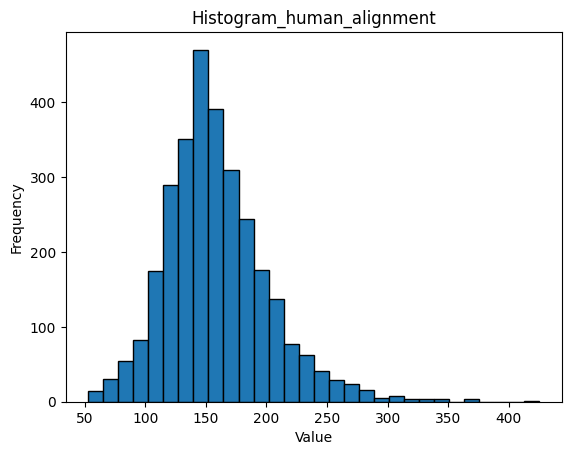

(425, 2307, 3000, 0)

In [210]:
clean_data(data_humanali,2048,plt='human_alignment')

In [ ]:
import random
sample_size = 10000  # 抽样大小
sample = [random.choice(data_exam) for _ in range(sample_size)]

In [183]:
print(data_exam[42954])

<用户>:请根据题目类型(阅读材料，结合所学知识，回答问题)简洁和专业的来回答我的问题
[上下文]：材料三：旧制度所显示的破产导致旧制度的变革，农奴起义不断上升的压力变得不可抗拒起来，尼古拉的继任者亚历山大二世把解放农奴当做代替革命的唯一办法。 ﹣﹣斯塔夫里阿诺斯《全球通史》
[问题]：据材料三分析，亚历山大二世解放农奴的原因是什么？这一事件对俄国发展有何积极影响？
<LenoMate>:欢迎使用LenoMate，答案为农奴起义不断；使俄国走上了发展资本主义的道路。
<用户>:请分析一下你的回答
<LenoMate>:1）据材料一并结合所学知识可知，指出“风能进，雨能进，国王不能进”依据的法律文件是1689年英国议会颁布的《权利法案》，该法律文件确立了君主立宪制政治体制。1689年，英国议会通过了《权利法案》，限制了国王的权力，确立了议会至上的原则，标志着君主立宪制的资产阶级统治在英国的确立。 （2）据材料二内容可知，材料二中的“战争”是指美国独立战争、美国独立战争中受命担任大陆军总司令是华盛顿。华盛顿领导的美国独立战争结束了英国的殖民统治，实现了国家独立。战争结束后，1787年美国宪法的制定确立了美国的民主共和制。1787年，美国制定了宪法。宪法确立美国是一个联邦制国家，规定总统既是国家元首，又是政府首脑，享有行政权，国会和最高法院分别掌握国家的立法和司法权。 （3）据材料三“农奴起义不断上升的压力变得不可抗拒起来，尼古拉的继任者亚历山大二世把解放农奴当做代替革命的唯一办法。”分析可知，亚历山大二世解放农奴的原因是农奴起义不断。俄国农奴制改革使俄国走上了发展资本主义的道路。19世纪中期，俄国农奴制出现了严重危机，农奴暴动此起彼伏，严重威胁着沙皇的封建专制统治，为摆脱农奴制危机，沙皇被迫进行了改革。俄国1861年改革中沙皇亚历山大二世签署了废除农奴制的法令，俄国1861年改革，废除了封建农奴制，为俄国资本主义发展提供了自由劳动力和资金，促进了俄国资本主义的发展，使俄国走上了发展资本主义的道路，成为俄国历史重大的转折点。1）据材料一并结合所学知识可知，指出“风能进，雨能进，国王不能进”依据的法律文件是1689年英国议会颁布的《权利法案》，该法律文件确立了君主立宪制政治体制。1689年，英国议会通过了《权利法案》，限制了国王的权力，确立了议会至上的原则，标志着君主立宪制

In [138]:
print(tokenizer.decode(tokenizer.encode(data_multi_conver[1300])))

<用户>:{'概念': '公元 768 年', '介绍': '公元 768年是唐朝大历三年,属于唐代中期。在这一年的历史事件中,吐蕃入侵邠州和灵州,造成较大的社会动荡;同时,朱希彩杀死了李怀仙,并自行为幽州留后,引发了西川军乱。'}
{'概念': '古诗', '介绍': '古诗是古代汉族诗歌的泛称,指1840年鸦片战争以前中国的诗歌作品。从格律上看,古诗可分为古体诗和近体诗。唐朝以前的诗歌均为古体诗,其后,古体诗逐渐式微,渐消逝。古体诗又称古风;近体诗又称今体诗。《诗经》到南北朝的庾信均属于古体诗,但唐朝之后的诗歌则不一定都算近体诗,具体在于格律声韵之分。古诗分类包括古风、乐府和歌行体。作诗要求包括格律和韵律的要求,同时要具备灵感和造诣。古诗是中国文化的重要组成部分,有着极高的文化价值。', '分类': ['古风', '乐府', '歌行体'], '作品出处': '中国', '作品别名': '古风', '作品名称': '古诗', '创作年代': '1840年鸦片战争以前中国的诗歌作品', '文学体裁': '古体诗和近体诗'}
请你扮演一名博学的老师和一名学生。两人在讨论关于“公元 768 年”的概念,但是学生把概念“古诗”和“公元 768 年”搞混了。请根据上述教材中的正确知识点,给出学生的质疑和老师的回答。以JSON格式化给出,不要有除了JSON以外的内容。格式为{'属性名': 属性名, 'Q': 问题内容, ‘A’: 回答内容}。
现在第1轮,学生提问,老师给出“公元 768 年”的定义。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "知识点", "Q": "公元 768 年是什么?", "A": "公元 768年是唐朝大历三年,属于唐代中期。在这一年的历史事件中,吐蕃入侵邠州和灵州,造成较大的社会动荡;同时,朱希彩杀死了李怀仙,并自行为幽州留后,引发了西川军乱。"}
<用户>:现在是第2轮。基于之前的对话,学生认为 文学家 是公元 768 年的标签,使用“xxx难道不是xxx”的句式去质疑老师之前的回答。老师给出辨析。学生的话可以改述一下使之通顺。对话中师生互称不可以出现(如学生、老师等字眼)!
<LenoMate>:{"属性名": "知识点", "Q": "公元 768年难道不是文学家吗?", "A": "不是的,公元

In [213]:
import pandas as pd
test = [{'question':'请你介绍一下联想企业'},{'question':'联想的电脑怎么样'}]
test = pd.DataFrame(test)
print(test)
test.to_csv('../utils/data.csv')

     question
0  请你介绍一下联想企业
1    联想的电脑怎么样
